Import des bibliothèques

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lire les 3 fichiers: Coupon.csv, Order.csv et Product.csv

In [108]:
coupon=pd.read_csv('Coupon.csv')
coupon.info()
coupon.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21050 entries, 0 to 21049
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   orderId     21050 non-null  int64
 1   couponUsed  21050 non-null  int64
dtypes: int64(2)
memory usage: 329.0 KB


,orderId,couponUsed
0,219193,1
1,219198,1
2,219207,1
3,219217,1
4,219219,1


In [109]:
#Il faut spécifier que le séparteur est ; afin de lire correctement le fichier 'Order.csv'
order=pd.read_csv('Order.csv',sep=';')
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96778 entries, 0 to 96777
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   orderId        96778 non-null  int64  
 1   sellerId       96778 non-null  object 
 2   buyerId        96778 non-null  object 
 3   createdAt      96778 non-null  object 
 4   amount         96778 non-null  float64
 5   status         96778 non-null  object 
 6   shippingPrice  96778 non-null  float64
 7   fees           96778 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.9+ MB


,orderId,sellerId,buyerId,createdAt,amount,status,shippingPrice,fees
0,217004,Mn2N2xcmAyWmaE7GbArCXm8yzq93,E6RXNgSXZ9M2VJIb55iNyOKC6M63,01/07/2022 00:14,24.99,SELLER_PAID,2.59,1.55
1,217005,36bjCSM2xSZ4I99JAaOczQoZbG2,arOIR4GP6aSpt81L8REeRI0YOz73,01/07/2022 01:04,13.50,SELLER_PAID,2.59,1.03
2,217006,hZyfUaSzZEdDdxheLGJjab0z97r2,Y1urr9H8ttNXZi01EpvrfsZxK7D2,01/07/2022 01:39,10.12,SELLER_PAID,2.99,1.06
3,217008,wzWA5St34wPM7rOiuD8GSPmw1g73,kRLFglBn9odXKwIEHRXSRAmRJ1l1,01/07/2022 02:22,31.00,SELLER_PAID,2.59,1.45
4,217010,FIWW5NyvdpVpWKAyZaznWgWgvb03,FCp6t2GsNSaxVsWB0kgAylDUWDP2,01/07/2022 02:38,12.80,SELLER_PAID,2.99,0.89


In [110]:
#Il faut spécifier que le séparteur est ; afin de lire correctement le fichier 'Product.csv'
product=pd.read_csv('Product.csv',sep=';')
product.info()
product.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171403 entries, 0 to 171402
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   productId      171403 non-null  int64 
 1   orderId        171403 non-null  int64 
 2   category       171403 non-null  object
 3   macroCategory  171360 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.2+ MB


,productId,orderId,category,macroCategory
0,1359,228515,Pots,Childcare
1,1713,227948,Accessoires maternité,Clothing
2,3843,243603,Pyjamas & Vêtements de nuit (fille),Clothing
3,4427,297805,Porteurs,Childcare
4,7300,269071,Pyjamas & vêtements de nuit (garçon),Clothing


Investiguer s'il ya des valeurs nulles et les remplacer par des valeurs plus significatives

In [111]:
print(product.isna().sum().sort_values(ascending=False))
#Remplacer les valeurs nulles des macrocatégories par la valeur 'not specified'
product.fillna({'macroCategory': 'Not specified'}, inplace=True)
print('\n\n')
print(coupon.isna().sum().sort_values(ascending=False))
print('\n\n')
print(product.isna().sum().sort_values(ascending=False))

macroCategory    43
productId         0
orderId           0
category          0
dtype: int64



orderId       0
couponUsed    0
dtype: int64



productId        0
orderId          0
category         0
macroCategory    0
dtype: int64


Voir s'il ya des lignes dupliquées 

In [112]:
coupon.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21045    False
21046    False
21047    False
21048    False
21049    False
Length: 21050, dtype: bool

In [113]:
product.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
171398    False
171399    False
171400    False
171401    False
171402    False
Length: 171403, dtype: bool

In [114]:
order.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
96773    False
96774    False
96775    False
96776    False
96777    False
Length: 96778, dtype: bool

Visualization des valeurs de status des commandes

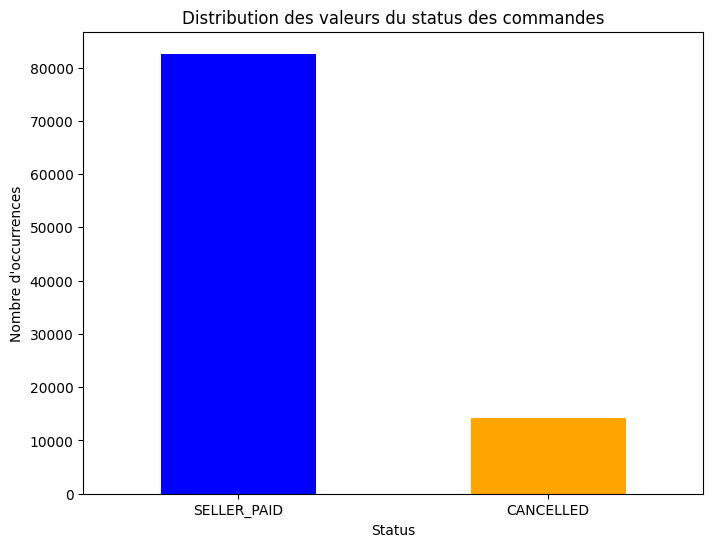

In [115]:
data = order['status']

value_counts = data.value_counts()

# Création du bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution des valeurs du status des commandes')
plt.xlabel('Status')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)
plt.show()


Calcul du montant total des achats confirmés pour chaque acheteur avec tri descendant

In [116]:
#afin de calculer correctement le montant total des achats il faut ajouter la condition 'status'=='SELLER_PAID'
Mnt_total_acheté= order[order['status']=='SELLER_PAID'].groupby('buyerId')['amount'].sum().sort_values(ascending=False)
Mnt_total_acheté.head()

buyerId
de3eCL6Zo6c5dyvA8DuUxlb1byL2    5189.96
ZXgK4Yz783gobtRt2DSuBP47Dnm2    2039.60
gViNiPLN3whMjpxxPQtkSU4HW9j2    1763.12
FCp6t2GsNSaxVsWB0kgAylDUWDP2    1583.47
znMxL0tjPBPWE9mSGrWDPVaQM2W2    1571.01
Name: amount, dtype: float64

Calcul du nombre total des produits choisis et acheté par chaque client avec tri descendant 

In [117]:
#Fairee la jointure avec la table product
merged_order_produit=pd.merge(order,product, on='orderId',how= 'left')
#Calcul du nombre total de produits par acheteur
nb_produits=merged_order_produit[merged_order_produit['status']=='SELLER_PAID'].groupby('buyerId')['productId'].count().sort_values(ascending=False)
nb_produits.head()

buyerId
6nO4Jc2j9gRak3PZoJT7jHB9Wc42    518
znMxL0tjPBPWE9mSGrWDPVaQM2W2    280
FCp6t2GsNSaxVsWB0kgAylDUWDP2    238
YxscTpy3fIOwYPPVlXpDRHjaoRa2    196
nKlyzpLK9YaHq8vNCgpYeNC1nYP2    173
Name: productId, dtype: int64

Les tendances de produits achetés par client

In [143]:
nb_best_seller = merged_order_produit[merged_order_produit['status'] == 'SELLER_PAID'] \
    .groupby(['buyerId', 'category', 'macroCategory'])['productId'].count().sort_values(ascending=False)

nb_best_seller.head()

buyerId                       category                macroCategory    
6nO4Jc2j9gRak3PZoJT7jHB9Wc42  Figurines               Toys & Multimedia    470
AvXATAQMhPTCkO9TSCUShjTZntQ2  Figurines               Toys & Multimedia     78
2IG5bXy1TddECjbl9ye8BvX6chl2  Figurines               Toys & Multimedia     65
u6feOt3vniR1l2sWxXMBzO4pjgv1  Figurines               Toys & Multimedia     52
oULjEKcSRUaxZkYKck69BgLFVaB2  Cartes à collectionner  Toys & Multimedia     49
Name: productId, dtype: int64

Calcul du nombre total des commandes passées de chaque acheteur

In [119]:
nb_commandes=order[order['status']=='SELLER_PAID'].groupby('buyerId')['orderId'].count().sort_values(ascending=False)
nb_commandes.head()

buyerId
gY08DkaLG6TL3y41jUvE7Gwl2H32    73
SU0YOJOvXyWRk1QVllIfYkW1OSt1    70
rk3tyebTEaSY1Zt7CvoK4DKNmGp1    70
ZXgK4Yz783gobtRt2DSuBP47Dnm2    68
FCp6t2GsNSaxVsWB0kgAylDUWDP2    64
Name: orderId, dtype: int64

Calcul du nombre total de coupons utilisés par acheteur 

In [120]:
merged_order_coupon=pd.merge(order,coupon, on='orderId',how='left')
nb_coupons=merged_order_coupon[merged_order_coupon['status']=='SELLER_PAID'].groupby('buyerId')['couponUsed'].sum().sort_values(ascending=False)
nb_coupons.head()

buyerId
i8qUxgx2aZRM3qLnbj5o1j2cYWd2    15.0
w1Avk1p30wXJQdGrKIPl5ZHVjj62    13.0
gViNiPLN3whMjpxxPQtkSU4HW9j2    12.0
k8mH2UZUUTbrbUPwkdDdafNOap23    12.0
OcqTqrVUKDYGKxk1K6Jm4K2mdjg2    12.0
Name: couponUsed, dtype: float64

Création d'une dataframe qui regroupe les quatre critères calculés 

In [121]:
Top_acheteurs=pd.concat([Mnt_total_acheté,nb_commandes,nb_produits,nb_coupons],axis=1)
Top_acheteurs.head()
#Renommer les colonnes
Top_acheteurs.columns=['Montant total achat','Nombre de commandes','Nombre de produits','Nombre de coupons utilisé']
Top_acheteurs.head()

,Montant total achat,Nombre de commandes,Nombre de produits,Nombre de coupons utilisé
buyerId,,,,
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,30,0.0
ZXgK4Yz783gobtRt2DSuBP47Dnm2,2039.60,68,105,5.0
gViNiPLN3whMjpxxPQtkSU4HW9j2,1763.12,61,131,12.0
FCp6t2GsNSaxVsWB0kgAylDUWDP2,1583.47,64,238,10.0
znMxL0tjPBPWE9mSGrWDPVaQM2W2,1571.01,60,280,7.0


In [122]:
Top_acheteurs.describe()

,Montant total achat,Nombre de commandes,Nombre de produits,Nombre de coupons utilisé
count,37001.000000,37001.000000,37001.000000,37001.000000
mean,65.460414,2.232399,4.002567,0.552796
std,80.265953,2.904901,8.029689,0.954578
min,1.000000,1.000000,1.000000,0.000000
25%,24.000000,1.000000,1.000000,0.000000
50%,43.900000,1.000000,2.000000,0.000000
75%,77.000000,2.000000,4.000000,1.000000
max,5189.960000,73.000000,518.000000,15.000000


Création des box plots pour voir la dispersion de la data pour chaque critère calculé

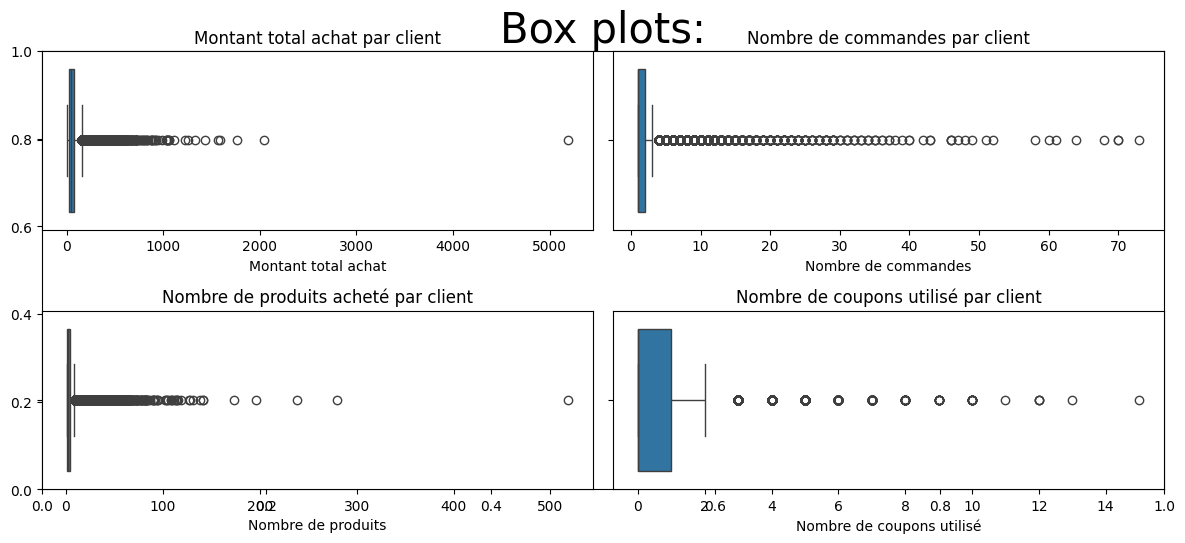

In [123]:
# Création des box plots avec seaborn
plt.figure(figsize=(12, 6))
plt.title('Box plots:',size=30)

# Box plot pour Montant total achat
plt.subplot(2, 2, 1)
sns.boxplot(x=Top_acheteurs['Montant total achat'])
plt.title('Montant total achat par client')

# Box plot pour Nombre de commandes
plt.subplot(2, 2, 2)
sns.boxplot(x=Top_acheteurs['Nombre de commandes'])
plt.title('Nombre de commandes par client')

# Box plot pour Nombre de produits
plt.subplot(2, 2, 3)
sns.boxplot(x=Top_acheteurs['Nombre de produits'])
plt.title('Nombre de produits acheté par client')

# Box plot pour Nombre de coupons
plt.subplot(2, 2, 4)
sns.boxplot(x=Top_acheteurs['Nombre de coupons utilisé'])
plt.title('Nombre de coupons utilisé par client')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

Voir s'il y'a des corrélations entre les différents critères pour savoir un peu plus sur les tendances des clients

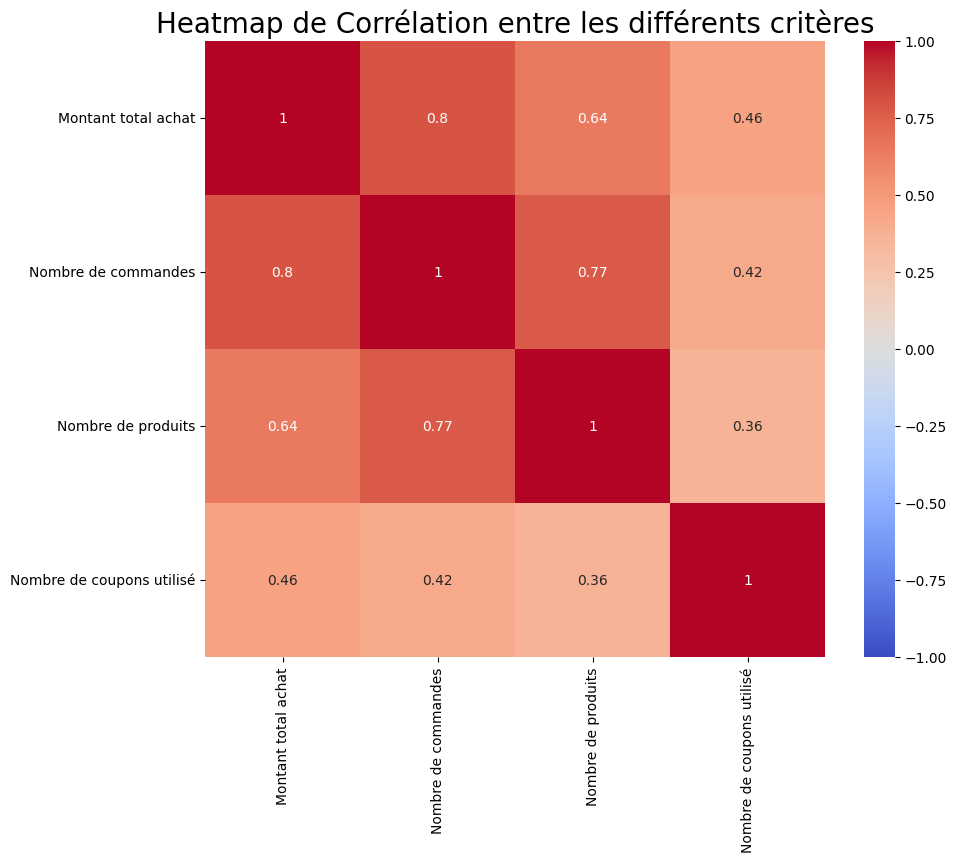

In [124]:
# Création de la matrice de corrélation
correlation_matrix = Top_acheteurs.corr()

# Création de la heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Corrélation entre les différents critères',size=20)
plt.show()

Visualisation des nuages de points entre le nombre de commandes et le montant total achat par client

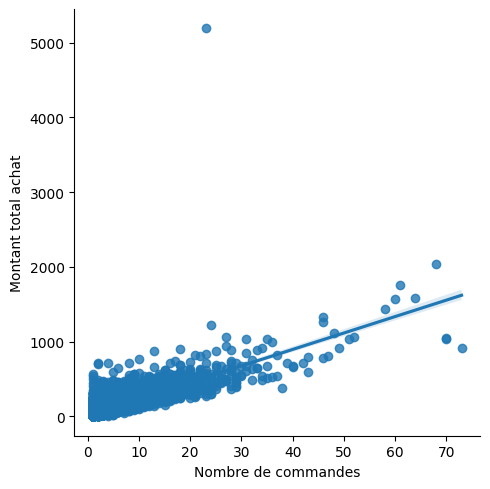

In [125]:
sns.lmplot(x='Nombre de commandes',y='Montant total achat',data=Top_acheteurs)

Visualisation des nuages de points entre le nombre de produits et le nombre de commandes par client

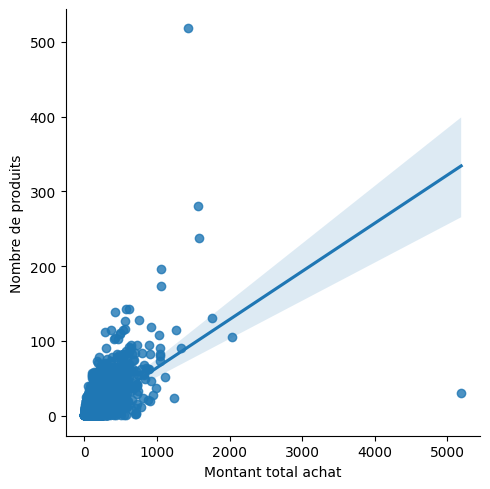

In [126]:
sns.lmplot(x='Montant total achat',y='Nombre de produits',data=Top_acheteurs)

Ilustration des nuages de points entre le nombre de coupons et le montant total d'achat par client

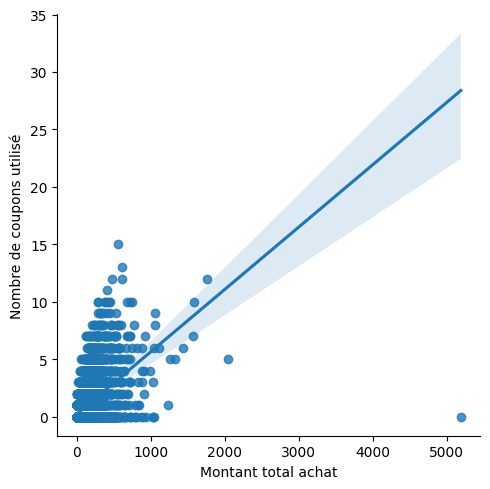

In [127]:
sns.lmplot(x='Montant total achat',y='Nombre de coupons utilisé',data=Top_acheteurs)

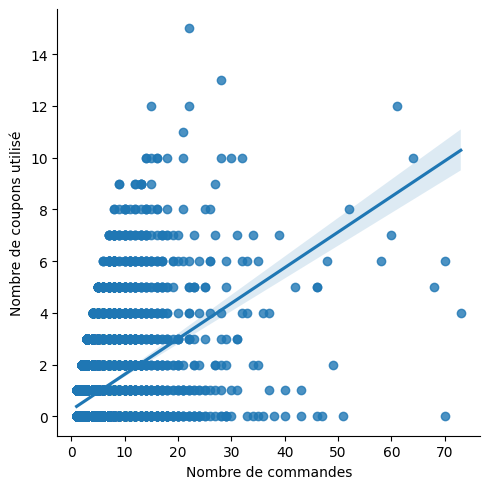

In [128]:
sns.lmplot(x='Nombre de commandes',y='Nombre de coupons utilisé' ,data=Top_acheteurs)

Analyse des commandes annulées des clients

In [129]:
#Calcul du nombre total de produits annulés par acheteur
nb_produits_annulés=merged_order_produit[merged_order_produit['status']=='CANCELLED'].groupby('buyerId')['productId'].count().sort_values(ascending=False)
nb_produits_annulés.describe()

count    9873.000000
mean        2.247848
std         2.993248
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        51.000000
Name: productId, dtype: float64

Calcul du montant total d'achat annulé par client

In [130]:
Mnt_total_annulé= order[order['status']=='CANCELLED'].groupby('buyerId')['amount'].sum().sort_values(ascending=False)
Mnt_total_annulé.describe()

count     9873.000000
mean        42.993672
std        356.122973
min          1.000000
25%         17.000000
50%         28.000000
75%         47.000000
max      35120.050000
Name: amount, dtype: float64

Calcul du nombre de commandes annulées par client

In [131]:
nb_commandes_annulé=order[order['status']=='CANCELLED'].groupby('buyerId')['orderId'].count().sort_values(ascending=False)
nb_commandes_annulé.describe()

count    9873.000000
mean        1.435936
std         1.213934
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        44.000000
Name: orderId, dtype: float64

Création des vilolin plots pour mieux comprendre la dispersion de la data des commandes annulés

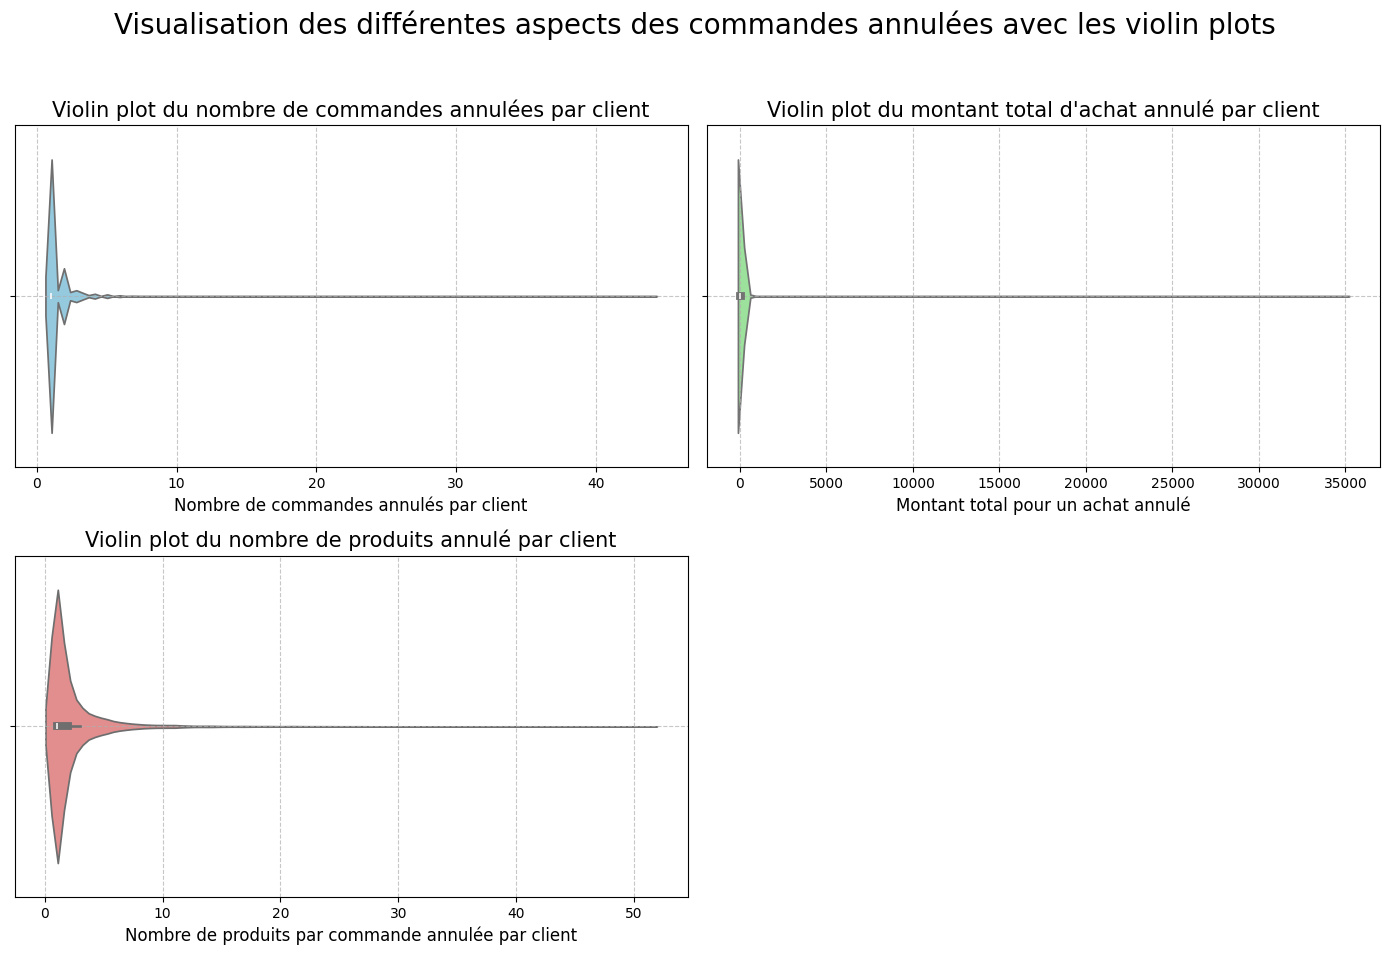

In [132]:
# Création des violin plots avec seaborn
plt.figure(figsize=(14, 10))
plt.suptitle('Visualisation des différentes aspects des commandes annulées avec les violin plots', size=20)

# Violin plot du nombre de commandes annulés
plt.subplot(2, 2, 1)
sns.violinplot(x=nb_commandes_annulé, color='skyblue')
plt.title('Violin plot du nombre de commandes annulées par client', fontsize=15)
plt.xlabel('Nombre de commandes annulés par client', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Violin plot du montant total achat annulé
plt.subplot(2, 2, 2)
sns.violinplot(x=Mnt_total_annulé, color='lightgreen')
plt.title('Violin plot du montant total d\'achat annulé par client', fontsize=15)
plt.xlabel('Montant total pour un achat annulé', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Violin plot du nombre de produits par commande annulé
plt.subplot(2, 2, 3)
sns.violinplot(x=nb_produits_annulés, color='lightcoral')
plt.title('Violin plot du nombre de produits annulé par client', fontsize=15)
plt.xlabel('Nombre de produits par commande annulée par client', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [133]:
#Top_acheteurs_préférence= pd.merge(Top_acheteurs,nb_best_seller,on='buyerId',how='left')
#Top_acheteurs_préférence.head()

In [141]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Supposons que Top_acheteurs et nb_best_seller sont vos DataFrames
# Top_acheteurs contient : 'Montant total achat', 'Nombre de commandes', 'Nombre de produits', 'Nombre de coupons'
# nb_best_seller contient : 'buyerId', 'categorie'

# Fusionner les deux DataFrames sur la clé commune, par exemple 'buyerId'
Top_acheteurs = Top_acheteurs.merge(nb_best_seller, on='buyerId', how='left')
Top_acheteurs.head()
# Sélectionner les colonnes numériques et catégorielles
numeric_features = ['Montant total achat', 'Nombre de commandes', 'Nombre de produits', 'Nombre de coupons']
categorical_features = ['category']

# Préparer la transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Créer le pipeline de clustering
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Appliquer le pipeline sur les données
kmeans_pipeline.fit(Top_acheteurs)

# Ajouter les labels des clusters au DataFrame
Top_acheteurs['Cluster'] = kmeans_pipeline.predict(Top_acheteurs)

# Afficher les caractéristiques moyennes des clusters formés
cluster_means = Top_acheteurs.groupby('Cluster').mean()
print(cluster_means)


,Montant total achat,Nombre de commandes,Nombre de produits,Nombre de coupons utilisé,productId_x,productId_y,productId
buyerId,,,,,,,
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,30,0.0,26,26,26
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,30,0.0,26,26,3
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,30,0.0,26,26,1
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,30,0.0,26,3,26
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,30,0.0,26,3,3
